In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [11]:
output_data = "Resources/Project1Data.csv"
output_data2 = "Resources/2018SASB.csv"
data_df = pd.read_csv(output_data)
data2_df = pd.read_csv(output_data2)
data_df

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/Project1Data.csv'

In [12]:
data_df["SCL_NAME"].nunique()

NameError: name 'data_df' is not defined

In [ ]:
# APR scores over time
combined_years_df = data_df[["SPORT_NAME", "APR_RATE_2019_1000", "APR_RATE_2018_1000", "APR_RATE_2017_1000"]]
combined_years_df

combined_years_df["SPORT_NAME"].nunique()



In [ ]:
# Create grouped dataframe by sport 
mean_df = combined_years_df['APR_RATE_2019_1000'].groupby(combined_years_df['SPORT_NAME']).mean()
mean_df = mean_df.reset_index()
mean_df = pd.DataFrame({"APR_RATE_2019_1000": mean})
mean_df

# Graph sport vs average APR score
sport_names = mean_df.index.tolist()
x_axis = sport_names
y_axis = mean_df["APR_RATE_2019_1000"]

plt.figure(figsize = (10,5))
plt.bar(x_axis,y_axis)
plt.xticks(x_axis,rotation="vertical")

# Labels
plt.ylabel("Average Rate")
plt.title("2019 Average Academic Performance Rate by Division 1 Sport")
plt.ylim(950,1000)

plt.savefig("Images/SportComparisonAPR_bar_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [3]:
mean_df = mean_df.reset_index()
mean_df["SPORT_NAME"]

NameError: name 'mean_df' is not defined

In [4]:
# Gender comparison of APR scores

# Separate Mens and Womens sports into lists
Mens_sports = []
Womens_sports = []

for sport_name in sport_names:

    if "Women's" in sport_name:
    
        Womens_sports.append(sport_name)
               
    else:
        Mens_sports.append(sport_name)
        
print(Womens_sports)
print(Mens_sports)


NameError: name 'sport_names' is not defined

In [5]:
# Dataframe for womens sports and avg APR score

Womens_APR = mean_df[mean_df["SPORT_NAME"].isin(Womens_sports)]
Womens_APR

NameError: name 'mean_df' is not defined

In [6]:
# Dataframe for mens sports and avg APR score

Mens_APR = mean_df[mean_df["SPORT_NAME"].isin(Mens_sports)]
Mens_APR

NameError: name 'mean_df' is not defined

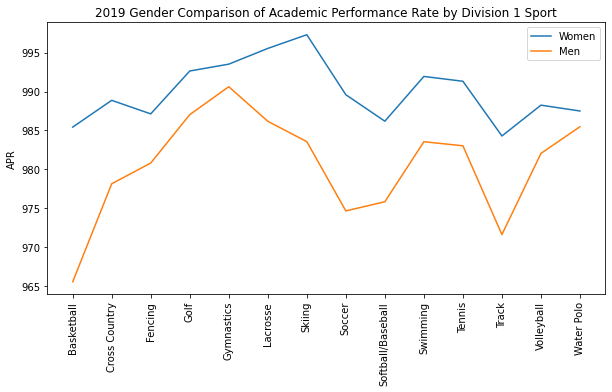

In [7]:
# Mens vs Womens 2019 average

sport_list = ["Basketball", "Cross Country", "Fencing", "Golf", "Gymnastics","Lacrosse","Skiing","Soccer","Softball/Baseball"
              ,"Swimming","Tennis","Track","Volleyball","Water Polo"]
Mens = [965.55, 978.15,980.81,987.03, 990.62, 986.18, 983.56, 974.66, 975.84, 983.55, 983.03, 971.62, 982.05, 985.48 ]

Womens = [985.43, 988.87, 987.13, 992.64, 993.52, 995.54, 997.30, 989.59, 986.19, 991.94, 991.32, 984.29, 988.25, 987.50]
    
plt.figure(figsize = (10,5))
plt.plot(sport_list, Womens, label = "Women")
plt.plot(sport_list, Mens, label = "Men")
plt.xticks(sport_list,rotation="vertical")
plt.legend()
plt.title("2019 Gender Comparison of Academic Performance Rate by Division 1 Sport")
plt.ylabel("APR")

plt.savefig("Images/GenderComparisonAPR_line_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [8]:
data2_df

NameError: name 'data2_df' is not defined

In [9]:
# Comparing federal student athelete rate with federal student body rate

fed_rate_df = data2_df[["SCL_NAME", "FED_N_SA", "FED_RATE_SA", "FED_N_SB", "FED_RATE_SB"]].dropna()
fed_rate_df

NameError: name 'data2_df' is not defined

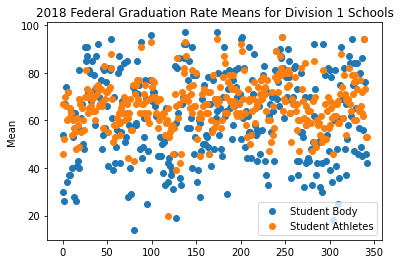

In [45]:
# Scatter Plot of Data
sample = fed_rate_df["FED_RATE_SA"]
population = fed_rate_df["FED_RATE_SB"]

plt.subplot(1, 1, 1)
plt.scatter(range(len(population)), population, label="Student Body")
plt.scatter(range(len(sample)), sample, label="Student Athletes")
plt.legend()
plt.ylabel("Mean")
plt.title("2018 Federal Graduation Rate Means for Division 1 Schools")

plt.savefig("Images/ttest_scatter_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

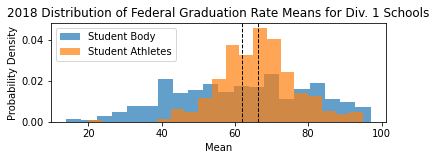

In [46]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="Student Body")
plt.hist(sample, 20, density=True, alpha=0.7, label="Student Athletes")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.title("2018 Distribution of Federal Graduation Rate Means for Div. 1 Schools")
plt.ylabel("Probability Density")
plt.xlabel("Mean")

plt.savefig("Images/ttest_dist_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [47]:
st.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=8.107709909389616, pvalue=9.29815490794947e-15)

Since our p-value is less than 0.05, we can reject our null hypothesis and conclude that, 
in terms of federal academic success rate, there is generally more academic success amongst student athletes 
compared to the general student body.

In [ ]:
# Pie chart of Student Body Count vs athlete count

labels = ['Student Athletes', 'Student Body']
size = [49.80, 50.20]
plt.title('Total Student Athletes vs Student Body')
plt.ylabel('Sex')
Count = fed_rate_df["FED_N_SA"]["FED_N_SB"].sum()
plot = fed_rate_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.show()

In [ ]:
# Geographical representation of schools by APR score